In [1]:
import math

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
import tensorflow as tf
from tensorflow.python.data import Dataset

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

/Users/pisit/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
rna_dataframe = pd.read_csv('/Users/pisit/Desktop/indiv/data.csv')
rna_dataframe = rna_dataframe.reindex(np.random.permutation(rna_dataframe.index))
rna_dataframe

0_a  0_t  0_c  0_g  1_a  1_t  1_c  1_g  2_a  2_t   ...    57_g  58_a  \
34161    0    0    0    1    1    0    0    0    0    0   ...       0     0   
22802    0    1    0    0    0    0    0    1    0    1   ...       0     0   
38140    1    0    0    0    0    0    0    1    0    0   ...       0     0   
34098    0    0    1    0    0    0    0    1    0    0   ...       1     1   
29242    1    0    0    0    0    0    0    1    0    1   ...       1     0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...     ...   ...   
1679     1    0    0    0    1    0    0    0    0    0   ...       0     0   
34303    0    0    0    1    0    0    0    1    0    0   ...       1     0   
18338    0    0    0    1    1    0    0    0    1    0   ...       0     0   
24141    0    0    0    1    0    0    1    0    0    0   ...       1     0   
38580    0    1    0    0    0    0    1    0    0    1   ...       0     0   

       58_t  58_c  58_g  59_a  59_t  59_c  59_g  lncrna  
34161     1     0     0     0     0     0     1       0  
22802     0     1     0     0     1     0     0       0  
38140     1     0     0     0     1     0     0       0  
34098     0     0     0     0     0     0     1       0  
29242     0     0     1     0     0     1     0       0  
...     ...   ...   ...   ...   ...   ...   ...     ...  
1679      0     0     1     0     0     0     1       1  
34303     0     0     1     0     1     0     0       0  
18338     0     1     0     1     0     0     0       1  
24141     0     1     0     0     0     0     1       0  
38580     0     0     1     1     0     0     0       0  

[40000 rows x 241 columns]

In [3]:
rna_dataframe.describe()

0_a     0_t     0_c     0_g     1_a     1_t     1_c     1_g     2_a  \
count 40000.0 40000.0 40000.0 40000.0 40000.0 40000.0 40000.0 40000.0 40000.0   
mean      0.2     0.2     0.3     0.3     0.2     0.2     0.3     0.3     0.2   
std       0.4     0.4     0.4     0.4     0.4     0.4     0.4     0.4     0.4   
min       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
25%       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
50%       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
75%       0.0     0.0     1.0     1.0     0.0     0.0     1.0     1.0     0.0   
max       1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0   

          2_t   ...      57_g    58_a    58_t    58_c    58_g    59_a    59_t  \
count 40000.0   ...   40000.0 40000.0 40000.0 40000.0 40000.0 40000.0 40000.0   
mean      0.2   ...       0.3     0.2     0.2     0.3     0.3     0.2     0.2   
std       0.4   ...       0.4     0.4     0.4     0.4     0.4     0.4     0.4   
min       0.0   ...       0.0     0.0     0.0     0.0     0.0     0.0     0.0   
25%       0.0   ...       0.0     0.0     0.0     0.0     0.0     0.0     0.0   
50%       0.0   ...       0.0     0.0     0.0     0.0     0.0     0.0     0.0   
75%       0.0   ...       1.0     0.0     0.0     1.0     1.0     0.0     0.0   
max       1.0   ...       1.0     1.0     1.0     1.0     1.0     1.0     1.0   

         59_c    59_g  lncrna  
count 40000.0 40000.0 40000.0  
mean      0.3     0.3     0.5  
std       0.4     0.4     0.5  
min       0.0     0.0     0.0  
25%       0.0     0.0     0.0  
50%       0.0     0.0     0.5  
75%       1.0     1.0     1.0  
max       1.0     1.0     1.0  

[8 rows x 241 columns]

In [4]:
def preprocess_features(rna_dataframe):
    lst = []
    for i in range(60):
        lst.append(str(i) + "_a")
        lst.append(str(i) + "_t")
        lst.append(str(i) + "_c")
        lst.append(str(i) + "_g")
    selected_features = rna_dataframe[lst]
    processed_features = selected_features.copy()
    return processed_features

def preprocess_targets(rna_dataframe):
    output_targets = pd.DataFrame()
    output_targets["lncrna"] = rna_dataframe["lncrna"]
    return output_targets

In [5]:
#3781931
training_examples = preprocess_features(rna_dataframe).head(16000)
training_targets = preprocess_targets(rna_dataframe).head(16000)

validation_examples = training_examples.tail(4000)
validation_targets = training_targets.tail(4000)

training_examples = training_examples.head(12000)
training_targets = training_targets.head(12000)

test_examples = preprocess_features(rna_dataframe).tail(4000)
test_targets = preprocess_targets(rna_dataframe).tail(4000)

In [6]:
def construct_feature_columns(input_features):
  """Construct the TensorFlow Feature Columns.

  Args:
    input_features: The names of the numerical input features to use.
  Returns:
    A set of feature columns
  """

  return set([tf.feature_column.numeric_column(my_feature)
              for my_feature in input_features])

In [7]:
def my_input_fn(features, targets, batch_size=1, shuffle=True, num_epochs=None):
    """Trains a linear regression model.
  
    Args:
      features: pandas DataFrame of features
      targets: pandas DataFrame of targets
      batch_size: Size of batches to be passed to the model
      shuffle: True or False. Whether to shuffle the data.
      num_epochs: Number of epochs for which data should be repeated. None = repeat indefinitely
    Returns:
      Tuple of (features, labels) for next data batch
    """
    
    # Convert pandas data into a dict of np arrays.
    features = {key:np.array(value) for key,value in dict(features).items()}                                            
 
    # Construct a dataset, and configure batching/repeating.
    ds = Dataset.from_tensor_slices((features,targets)) # warning: 2GB limit
    ds = ds.batch(batch_size).repeat(num_epochs)
    
    # Shuffle the data, if specified.
    if shuffle:
      ds = ds.shuffle(10000)
    
    # Return the next batch of data.
    features, labels = ds.make_one_shot_iterator().get_next()
    return features, labels

In [8]:
def train_linear_regressor_model(
    learning_rate,
    steps,
    batch_size,
    training_examples,
    training_targets,
    validation_examples,
    validation_targets):

  periods = 10
  steps_per_period = steps / periods

  # Create a linear regressor object.
  my_optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
  my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)
  linear_regressor = tf.estimator.LinearRegressor(
      feature_columns=construct_feature_columns(training_examples),
      optimizer=my_optimizer
  )
    
  # Create input functions.
  training_input_fn = lambda: my_input_fn(training_examples, 
                                          training_targets["lncrna"], 
                                          batch_size=batch_size)
  predict_training_input_fn = lambda: my_input_fn(training_examples, 
                                                  training_targets["lncrna"], 
                                                  num_epochs=1, 
                                                  shuffle=False)
  predict_validation_input_fn = lambda: my_input_fn(validation_examples, 
                                                    validation_targets[""], 
                                                    num_epochs=1, 
                                                    shuffle=False)

  # Train the model, but do so inside a loop so that we can periodically assess
  # loss metrics.
  print("Training model...")
  print("RMSE (on training data):")
  training_rmse = []
  validation_rmse = []
  for period in range (0, periods):
    # Train the model, starting from the prior state.
    linear_regressor.train(
        input_fn=training_input_fn,
        steps=steps_per_period
    )
    
    # Take a break and compute predictions.
    training_predictions = linear_regressor.predict(input_fn=predict_training_input_fn)
    training_predictions = np.array([item['predictions'][0] for item in training_predictions])
    
    validation_predictions = linear_regressor.predict(input_fn=predict_validation_input_fn)
    validation_predictions = np.array([item['predictions'][0] for item in validation_predictions])
    
    # Compute training and validation loss.
    training_root_mean_squared_error = math.sqrt(
        metrics.mean_squared_error(training_predictions, training_targets))
    validation_root_mean_squared_error = math.sqrt(
        metrics.mean_squared_error(validation_predictions, validation_targets))
    # Occasionally print the current loss.
    print("  period %02d : %0.2f" % (period, training_root_mean_squared_error))
    # Add the loss metrics from this period to our list.
    training_rmse.append(training_root_mean_squared_error)
    validation_rmse.append(validation_root_mean_squared_error)
  print("Model training finished.")
  
  # Output a graph of loss metrics over periods.
  plt.ylabel("RMSE")
  plt.xlabel("Periods")
  plt.title("Root Mean Squared Error vs. Periods")
  plt.tight_layout()
  plt.plot(training_rmse, label="training")
  plt.plot(validation_rmse, label="validation")
  plt.legend()

  return linear_regressor

In [9]:
def train_linear_classifier_model(
    learning_rate,
    steps,
    batch_size,
    training_examples,
    training_targets,
    validation_examples,
    validation_targets):
    
  periods = 10
  steps_per_period = steps / periods
  
  # Create a linear classifier object.
  my_optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
  my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)
  linear_classifier = tf.estimator.LinearClassifier(
      feature_columns = construct_feature_columns(training_examples),
      optimizer = my_optimizer
  )
  
  # Create input functions.
  training_input_fn = lambda: my_input_fn(training_examples, 
                                          training_targets["lncrna"], 
                                          batch_size=batch_size)
  predict_training_input_fn = lambda: my_input_fn(training_examples, 
                                                  training_targets["lncrna"], 
                                                  num_epochs=1, 
                                                  shuffle=False)
  predict_validation_input_fn = lambda: my_input_fn(validation_examples, 
                                                    validation_targets["lncrna"], 
                                                    num_epochs=1, 
                                                    shuffle=False)
  
  # Train the model, but do so inside a loop so that we can periodically assess
  # loss metrics.
  print("Training model...")
  print("LogLoss (on training data):")
  training_log_losses = []
  validation_log_losses = []
  for period in range (0, periods):
    # Train the model, starting from the prior state.
    linear_classifier.train(
        input_fn=training_input_fn,
        steps=steps_per_period
    )
    # Take a break and compute predictions.    
    training_probabilities = linear_classifier.predict(input_fn=predict_training_input_fn)
    training_probabilities = np.array([item['probabilities'] for item in training_probabilities])
    
    validation_probabilities = linear_classifier.predict(input_fn=predict_validation_input_fn)
    validation_probabilities = np.array([item['probabilities'] for item in validation_probabilities])
    
    training_log_loss = metrics.log_loss(training_targets, training_probabilities)
    validation_log_loss = metrics.log_loss(validation_targets, validation_probabilities)
    # Occasionally print the current loss.
    print("  period %02d : %0.2f" % (period, training_log_loss))
    # Add the loss metrics from this period to our list.
    training_log_losses.append(training_log_loss)
    validation_log_losses.append(validation_log_loss)
  print("Model training finished.")
  
  # Output a graph of loss metrics over periods.
  plt.ylabel("LogLoss")
  plt.xlabel("Periods")
  plt.title("LogLoss vs. Periods")
  plt.tight_layout()
  plt.plot(training_log_losses, label="training")
  plt.plot(validation_log_losses, label="validation")
  plt.legend()

  return linear_classifier

Training model...
LogLoss (on training data):
  period 00 : 0.65
  period 01 : 0.62
  period 02 : 0.61
  period 03 : 0.60
  period 04 : 0.60
  period 05 : 0.60
  period 06 : 0.59
  period 07 : 0.59
  period 08 : 0.59
  period 09 : 0.60
Model training finished.


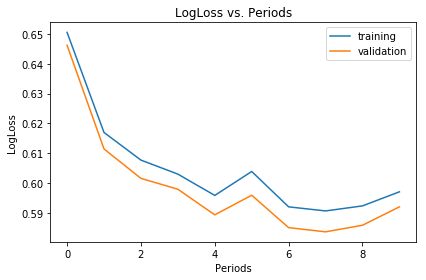

In [11]:
linear_classifier = train_linear_classifier_model(
    learning_rate=0.01,
    steps=250,
    batch_size=20,
    training_examples=training_examples,
    training_targets=training_targets,
    validation_examples=validation_examples,
    validation_targets=validation_targets)

In [12]:
predict_validation_input_fn = lambda: my_input_fn(validation_examples, 
                                                    validation_targets["lncrna"], 
                                                    num_epochs=1, 
                                                    shuffle=False)
evaluation_metrics = linear_classifier.evaluate(input_fn=predict_validation_input_fn)

print("AUC on the validation set: %0.2f" % evaluation_metrics['auc'])
print("Accuracy on the validation set: %0.2f" % evaluation_metrics['accuracy'])

AUC on the validation set: 0.76
Accuracy on the validation set: 0.70


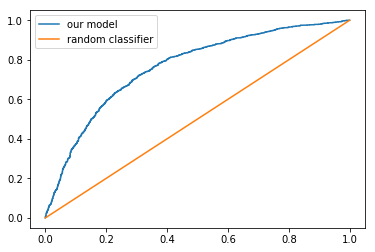

In [13]:
validation_probabilities = linear_classifier.predict(input_fn=predict_validation_input_fn)
# Get just the probabilities for the positive class.
validation_probabilities = np.array([item['probabilities'][1] for item in validation_probabilities])

false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(
    validation_targets, validation_probabilities)
plt.plot(false_positive_rate, true_positive_rate, label="our model")
plt.plot([0, 1], [0, 1], label="random classifier")
_ = plt.legend(loc=2)

In [14]:
predict_test_input_fn = lambda: my_input_fn(test_examples, 
                                                    test_targets["lncrna"], 
                                                    num_epochs=1, 
                                                    shuffle=False)
evaluation_metrics = linear_classifier.evaluate(input_fn=predict_test_input_fn)

print("AUC on the test set: %0.2f" % evaluation_metrics['auc'])
print("Accuracy on the test set: %0.2f" % evaluation_metrics['accuracy'])

AUC on the test set: 0.76
Accuracy on the test set: 0.70


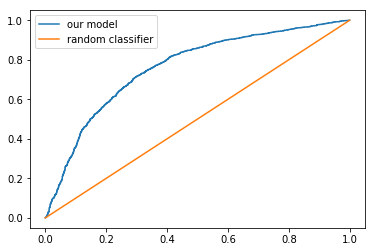

In [15]:
test_probabilities = linear_classifier.predict(input_fn=predict_test_input_fn)
# Get just the probabilities for the positive class.
test_probabilities = np.array([item['probabilities'][1] for item in test_probabilities])

false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(
    test_targets, test_probabilities)
plt.plot(false_positive_rate, true_positive_rate, label="our model")
plt.plot([0, 1], [0, 1], label="random classifier")
_ = plt.legend(loc=2)

In [ ]:
rna_dataframe.head(15000).describe()